In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

tips = pd.read_csv('D:/NDVI_exercise/wuhan_new2020/wuhan_new2020.csv')

In [5]:
# 波段信息
b2 = tips[['Image_id','B2','waterclass']].copy()
b2.rename(columns={'B2':'bandValue'}, inplace = True)
b2['bandName'] = 'B2'

b3 = tips[['Image_id','B3','waterclass']].copy()
b3.rename(columns={'B3':'bandValue'}, inplace = True)
b3['bandName'] = 'B3'

b4 = tips[['Image_id','B4','waterclass']].copy()
b4.rename(columns={'B4':'bandValue'}, inplace = True)
b4['bandName'] = 'B4'

b5 = tips[['Image_id','B5','waterclass']].copy()
b5.rename(columns={'B5':'bandValue'}, inplace = True)
b5['bandName'] = 'B5'

b6 = tips[['Image_id','B6','waterclass']].copy()
b6.rename(columns={'B6':'bandValue'}, inplace = True)
b6['bandName'] = 'B6'

b7 = tips[['Image_id','B7','waterclass']].copy()
b7.rename(columns={'B7':'bandValue'}, inplace = True)
b7['bandName'] = 'B7'

bands = b2.append(b3).append(b4).append(b5).append(b6).append(b7)
# b.iloc[3057]
# bands

In [9]:
# 指数信息
ndvi = tips[['Image_id','NDVI','waterclass']].copy()
ndvi.rename(columns={'NDVI':'Value'}, inplace = True)
ndvi['water-index'] = 'NDVI'

ndwi = tips[['Image_id','NDWI','waterclass']].copy()
ndwi.rename(columns={'NDWI':'Value'}, inplace = True)
ndwi['water-index'] = 'NDWI'

mndwi = tips[['Image_id','mNDWI','waterclass']].copy()
mndwi.rename(columns={'mNDWI':'Value'}, inplace = True)
mndwi['water-index'] = 'mNDWI'

cwi = tips[['Image_id','CWI','waterclass']].copy()
cwi.rename(columns={'CWI':'Value'}, inplace = True)
cwi['water-index'] = 'CWI'

awei = tips[['Image_id','AWEI','waterclass']].copy()
awei.rename(columns={'AWEI':'Value'}, inplace = True)
awei['water-index'] = 'AWEI'

ewi = tips[['Image_id','EWI','waterclass']].copy()
ewi.rename(columns={'EWI':'Value'}, inplace = True)
ewi['water-index'] = 'EWI'

evi = tips[['Image_id','EVI','waterclass']].copy()
evi.rename(columns={'EVI':'Value'}, inplace = True)
evi['water-index'] = 'EVI'

# index = ndvi.append(ndwi).append(mndwi).append(cwi).append(swi).append(awei).append(ewi).append(wi).append(evi).append(ndvi_mndwi)
index = ndvi.append(ndwi).append(mndwi).append(ewi)
# index

<IPython.core.display.Javascript object>


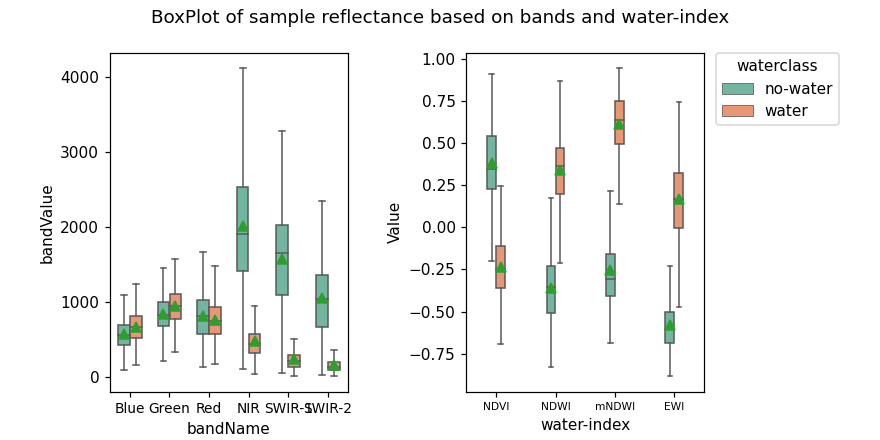

In [14]:
## 波段
fig,axes = plt.subplots(1,2,figsize=(8,4))
# orient参数表示箱形图的方向
sns.boxplot(x='bandName',y='bandValue',hue='waterclass',data=bands,orient='v',ax=axes[0],
            palette="Set2",width=0.6,linewidth=1,showfliers=False,showmeans=True)
## 可以调整箱子之间的间距
# sns.catplot(x='bandName',y='bandValue',hue='waterclass',data=bands,kind='box',orient='v',ax=axes[0],
#             palette="Set2",width=0.6,linewidth=1,aspect=0.6,showfliers=False,showmeans=True)
sns.boxplot(x='water-index',y='Value',hue='waterclass',data=index,orient='v',ax=axes[1],
            palette="Set2",width=0.3,linewidth=1,showfliers=False,showmeans=True)
# 修改X轴标签

axes[0].set_xticklabels(['Blue','Green','Red','NIR','SWIR-1','SWIR-2'],fontsize=9)
axes[1].set_xticklabels(['NDVI','NDWI','mNDWI','EWI'],fontsize=7)

#子图很有可能左右靠的很近，调整一下左右距离
plt.subplots_adjust(wspace=0.5)
# 设置标题
fig.suptitle('BoxPlot of sample reflectance based on bands and water-index')
# 移除图一的图例
axes[0].legend_.remove()
# 修改图二的图例
leg_handles = axes[1].get_legend_handles_labels()[0]
axes[1].legend(leg_handles,['no-water', 'water'],title='waterclass',loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad=0)
fig.subplots_adjust(right=0.8)

<IPython.core.display.Javascript object>


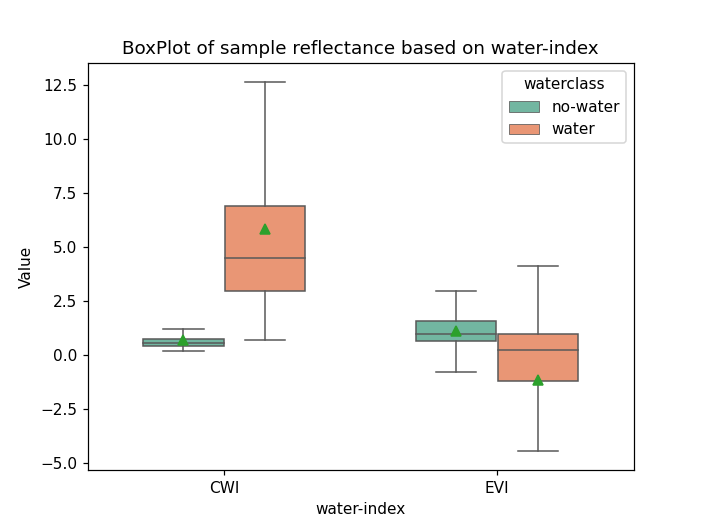

In [11]:
cwi_evi = cwi.append(evi)
## 指数
fig,axes = plt.subplots()
# orient参数表示箱形图的方向
sns.boxplot(x='water-index',y='Value',hue='waterclass',data=cwi_evi,orient='v',ax=axes,
            palette="Set2",width=0.6,linewidth=1,showfliers=False,showmeans=True)
# 设置标题
axes.set_title('BoxPlot of sample reflectance based on water-index')
# 修改X轴标签
axes.set_xticklabels(['CWI','EVI'])
# 修改图例
leg_handles = axes.get_legend_handles_labels()[0]
axes.legend(leg_handles, ['no-water', 'water'],title='waterclass')

<IPython.core.display.Javascript object>


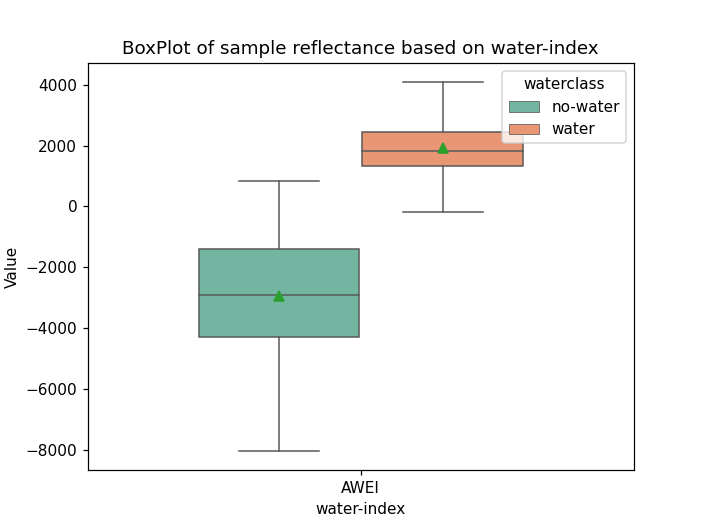

In [12]:
# ['NDVI','NDWI','mNDWI','CWI','SWI','AWEI','EWI','WI','EVI','ndvi_mndwi']

## 指数
fig,axes = plt.subplots()
sns.boxplot(x='water-index',y='Value',hue='waterclass',data=awei,orient='v',ax=axes,
            palette="Set2",width=0.6,linewidth=1,showfliers=False,showmeans=True)
axes.set_title('BoxPlot of sample reflectance based on water-index')
axes.set_xticklabels(['AWEI'])
leg_handles = axes.get_legend_handles_labels()[0]
axes.legend(leg_handles, ['no-water', 'water'],title='waterclass')

In [ ]:
## 波段
fig,axes = plt.subplots()
# orient参数表示箱形图的方向
sns.boxplot(x='bandName',y='bandValue',hue='waterclass',data=bands,orient='v',ax=axes,
            palette="Set2",width=0.6,linewidth=1,showfliers=False,showmeans=True)
# 设置标题
axes.set_title('BoxPlot of sample reflectance based on bands')
# 修改X轴标签
axes.set_xticklabels(['Blue','Green','Red','NIR','SWIR-1','SWIR-2'])
# 修改图例
leg_handles = axes.get_legend_handles_labels()[0]
axes.legend(leg_handles, ['no-water', 'water'],title='waterclass')

In [ ]:
## 指数
fig,axes = plt.subplots()
# orient参数表示箱形图的方向
sns.boxplot(x='water-index',y='Value',hue='waterclass',data=index,orient='v',ax=axes,
            palette="Set2",width=0.6,linewidth=1,showfliers=False,showmeans=True)
# 设置标题
axes.set_title('BoxPlot of sample reflectance based on water-index')
# 修改X轴标签
axes.set_xticklabels(['NDVI','mNDWI','NDVI_mNDWI','AWEI'])
# 修改图例
leg_handles = axes.get_legend_handles_labels()[0]
axes.legend(leg_handles, ['no-water', 'water'],title='waterclass')

# 方法1：利用pandas包中的Series.plot()、DataFrame.plot()或DataFrame.boxplot()方法

## Series.plot()

In [ ]:
fig,axes = plt.subplots()
tips[tips['waterclass'] == 1]['B2'].plot(kind='box',ax=axes)
axes.set_ylabel('values of tip_pct')
plt.show()
# # 将绘制的图形保存为p1.png
# fig.savefig('p1.png')    

## DataFrame.plot()

In [ ]:
fig,axes = plt.subplots(1,4)
# boxes表示箱体，whisker表示触须线，medians表示中位数，caps表示最大与最小值界限
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Red')
# sym参数表示异常值标记的方式
tips[tips['waterclass'] == 0][['B2','B3','B4','B5']].plot(kind='box',ax=axes,subplots=True,title='Different boxplots',color=color,sym='r+')
axes[0].set_ylabel('B2')
axes[1].set_ylabel('B3')
axes[2].set_ylabel('B4')
axes[3].set_ylabel('B5')
# 调整子图之间的间距
fig.subplots_adjust(wspace=1,hspace=1)

## DataFrame.boxplot()

In [ ]:
fig,axes = plt.subplots()
# column参数表示要绘制成箱形图的数据，可以是一列或多列
# by参数表示分组依据
tips.boxplot(column = 'B5',by=['waterclass'],ax=axes)
axes.set_ylabel('values of tip_pct')

# 方法2：
## 利用seaborn包中的cataplot()或者boxplot()，其中seaborn.boxplot()是seaborn.cataplot()的参数kind='box'时的一种情况；

In [ ]:
sns.catplot(x='waterclass',y='B5',hue='waterclass',kind='box',data=tips)
fig.legend()

## seaborn.boxplot()

In [ ]:
fig,axes = plt.subplots()
# orient参数表示箱形图的方向
sns.boxplot(x='waterclass',y='B5',hue='waterclass',data=tips,orient='v',ax=axes)

axes.set_title('Boxplots grouped by smoker')

# 方法3：
## 利用matplotlib包中axes对象的boxplot()方法。

In [ ]:
fig,axes = plt.subplots()
# sym参数表示异常值的标记方式
# positions表示箱形图的位置标签
axes.boxplot(x=tips['B3'],sym='rd',positions=[2]) 
axes.set_xlabel('tip_pct')